In [1]:
# imports
import io
import os
import sys
import dvc.api
import mlflow
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# adding scripts
sys.path.append('.')
sys.path.append('..')
sys.path.insert(1, '../scripts/')
import defaults as defs
import dataCleaner as dc
import dataVisualizer as dv

cleaner = dc.dataCleaner('exploratory data analysis notebook')
visualizer = dv.dataVisualizer('exploratory data analysis notebook')

--> <Logger dataCleaner (WARNING)>
logger <Logger dataCleaner (DEBUG)> created at path: ../logs/cleaner_root.log
Data cleaner in action
--> <Logger dataVisualizer (WARNING)>
logger <Logger dataVisualizer (DEBUG)> created at path: ../logs/visualizer_root.log
Data visualizer in action


In [3]:
# pandas settings
pd.set_option('display.max_columns', 30)

# version of the data
# v1 : gdrive 
# v2 : local messed up store
# v3 : local correct store
# v4 : local store: merged data file generated, data preparation completed
version = 'v4'

# read data sets using dvc api
test_data_url = dvc.api.get_url(path = defs.test_local_path, 
                                repo = defs.repo, 
                                rev = version)

train_data_url = dvc.api.get_url(path = defs.train_local_path, 
                                repo = defs.repo, 
                                rev = version)

store_data_url = dvc.api.get_url(path = defs.store_local_path, 
                                repo = defs.repo, 
                                rev = version)

full_data_url = dvc.api.get_url(path = defs.merged_local_path, 
                                repo = defs.repo, 
                                rev = version)
print('test data path: ' + test_data_url, '\ntrain data path: ' + train_data_url, '\nstore data path: ' + store_data_url, '\nmerged data path: ' + full_data_url)

test data path: C:\Users\f0x-tr0t\Documents\education\datascience\dvc-storage\d5\d6373bc6743cde41c22b4599dce90c 
train data path: C:\Users\f0x-tr0t\Documents\education\datascience\dvc-storage\1f\38ace4291877fe3b742e8b7a111377 
store data path: C:\Users\f0x-tr0t\Documents\education\datascience\dvc-storage\21\ffe65b18f58f4b58193c968654814c 
merged data path: C:\Users\f0x-tr0t\Documents\education\datascience\dvc-storage\2c\45c8bfea2787f193cb56fe88d8df04


In [4]:
# reading csv files
DateCols = ['Date']
missing_values = ["n/a", "na", "undefined", '?', 'NA', 'undefined']

test_data = pd.read_csv(test_data_url, na_values=missing_values, parse_dates=DateCols, low_memory=False)
train_data = pd.read_csv(train_data_url, na_values=missing_values, parse_dates=DateCols, low_memory=False)
full_data = pd.read_csv(full_data_url, na_values=missing_values, parse_dates=DateCols, low_memory=False)
store_data = pd.read_csv(store_data_url, na_values=missing_values, low_memory=False)

# Exploratory data analysis

## Univariate analysis

### Non-Graphical Univariate Analysis

In [9]:
full_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5472.856067,3323.989208,0.0,3727.0,5744.0,7584.0,14049.0
Customers,1017209.0,578.349312,348.356502,0.0,405.0,609.0,794.0,1485.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
StateHoliday,1017209.0,0.045163,0.283656,0.0,0.0,0.0,0.0,3.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
Year,1017209.0,2013.832292,0.777396,2013.0,2013.0,2014.0,2014.0,2015.0
Month,1017209.0,5.846762,3.326097,1.0,3.0,6.0,8.0,12.0


#### Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

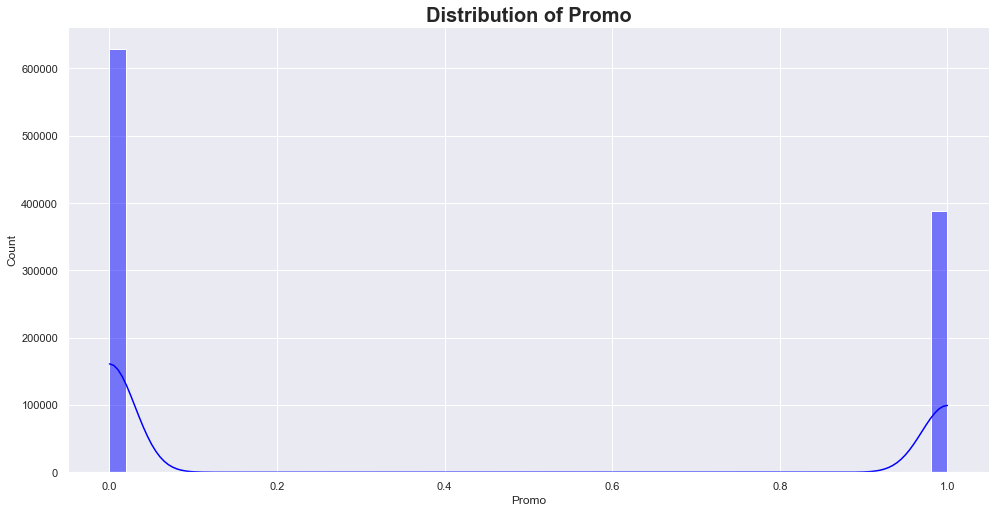

In [11]:
visualizer.plot_hist(train_data, 'Promo', 'blue')

In [ ]:
plot_hist(test_data, 'Promo', 'purple')

#### Store type

In [ ]:
# unique value counts
counts_df = store_data['StoreType'].value_counts()
counts_df

In [ ]:
plotly_plot_pie(store_data, 'StoreType')

#### Assortment

In [ ]:
# unique value counts
counts_df = store_data['Assortment'].value_counts()
counts_df

In [ ]:
plotly_plot_pie(store_data, 'Assortment')

In [ ]:
plotly_plot_hist(store_data, 'CompetitionDistance')

#### Day of week

In [ ]:
plot_count(train_data, 'DayOfWeek')

#### Sales

In [12]:
plot_hist(train_data, 'Sales', 'green')

NameError: name 'plot_hist' is not defined

#### Customers

In [ ]:
plot_hist(train_data, 'Customers', 'blue')

#### 0pen

In [ ]:
plot_count(train_data, 'Open')

#### Promo

In [ ]:
plot_count(train_data, 'Promo')

In [ ]:
# unique value counts
counts_df = store_data['Promo2'].value_counts()
counts_df

In [ ]:
plot_count(store_data, 'Promo2')

#### Holidays

In [ ]:
# unique value counts
counts_df = train_data['StateHoliday'].value_counts()
counts_df

In [ ]:
plotly_plot_pie(train_data, 'StateHoliday')

In [ ]:
# unique value counts
counts_df = train_data['SchoolHoliday'].value_counts()
counts_df

In [ ]:
plotly_plot_pie(train_data, 'SchoolHoliday')

### Graphical Univariate Analysis

## Bivariate analysis